# Bike Sharing Case Study

### By : Edwin Mathew

### Submission Date : 14th September 2022

## Problem Statement

US Bike-sharing trying to understand the demand for shared bikes after the Covid-19 which has caused a considereable dip in their revenues. The aim of this study is to create a Business Plan which could acceralte the profit after Covid-19 Pandemic.

The Company requirement is as follows - 

- To identify the variables that are affecting the use boom bikes e.g. temp, humidity, windspeed, holiday etc. 

- Create a linear model that can quantitavely relates to the usage of boom bikes

- Find out the accuracy of the model

### Steps

__These are the steps used to understand, analyse, predict and present the information :__ 

- Read the file, understand the data and visualize the data to see the behaviour (EDA, Exploraroty Data Analysis)
- Then the data will be split into trained and test data and train data will be rescalled 
- The Training data will be used to train Data
- Residual Analysis will conducted
- Predict and evaluate on the split test set
- Formulate the equation

### Libraries Used for the evalation

In [965]:
# Below are the required libraries for EDA and Multiple Linear Regression
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


#Supress warnings

import warnings
warnings.filterwarnings('ignore')

# this is to see more columns during analysis  
pd.options.display.max_columns = None
# this is to see more rows during analysis 
pd.options.display.max_rows = None



#### Step 1  : Reading and Understanding the Data

In [966]:
bikes = pd.read_csv("day.csv")

In [967]:
# Check the head of the dataset bikes dataframe
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [968]:
# Understand the shape of the data
bikes.shape

(730, 16)

In [969]:
# Understand the data type and if there is a missing values within the data
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


There are __730 rows__ and __16 columns__ it shows __no values are missing__ from the dataset and most of the data is in numerical format. dteday is not in datetime format.

In [970]:
# Describe the dataframe to understand the data structure.

bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Provided data meaning is shown below
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not 
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

From the above list we can see column __instant does not hold any meaning__ to the outcome we are intending, also __dteday__ column as other columns explain required information. Columns such as __casual and registered__ is accumulated and shown in cnt column so this can be __removed__ as well. Quick __Sanity Check will be done below__ to ensure these can be dropped without any issue.

In [971]:
print('Cnt True ? ', ~(bikes['casual'] + bikes['registered'] - bikes['cnt']).any())

Cnt True ?  True


In [972]:
bikes = bikes.drop(['instant','dteday', 'casual', 'registered'] , axis =1)

 ### Step 2  : Visualize the Data

Next step is visualize the data to understand the basic behaviour within the data this will show :

- if there is any multicolinarity going on within the data 
- if there is a strong relationships which can be seen

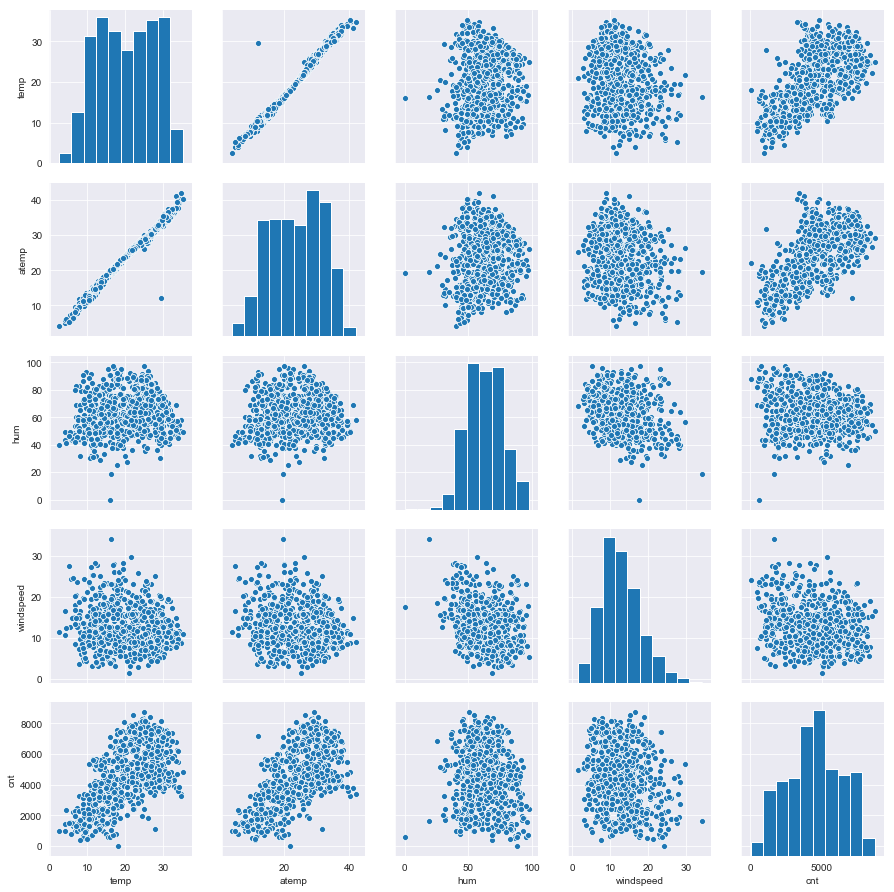

In [973]:
sns.pairplot(bikes[['temp','atemp','hum','windspeed','cnt' ]])
plt.show()

Pair plot shows a linear relation ship between temp and atemp as it is similar and related. It also shows relationship between temp,atemp and cnt. 

To understand the data bit more temp, atemp, windspeed and humidity and will be places into bins and plotted using line plot. These bins will be deleted before the next step

In [974]:
# For EDA purpose will be creating a bin and deleting it later on before model building
binstemp= [0, 10, 15, 20, 25,30,35, 40]
labelstemp = ['0-10','10-15','15-20','20-25','25-30','30-35','35-40']
bikes['tempbin']=pd.cut(bikes['temp'],bins =binstemp, labels=labelstemp)

In [975]:
# For EDA purpose will be creating a bin and deleting it later on before model building
binsatemp= [0, 10, 15, 20, 25,30,35, 40,45]
labelsatemp = ['0-10','10-15','15-20','20-25','25-30','30-35','35-40', '40-45']
bikes['atempbin']=pd.cut(bikes['temp'],bins =binsatemp, labels=labelsatemp)

In [976]:
# For EDA purpose will be creating a bin and deleting it later on before model building
binshum= [0, 20, 40, 60, 80,100]
labelshum = ['0-20','20-40','40-60','60-80','80-100']
bikes['humbin']=pd.cut(bikes['hum'],bins =binshum, labels=labelshum)

In [977]:
# For EDA purpose will be creating a bin and deleting it later on before model building
binswindspeed= [0, 10, 15, 20, 25,30,35, 40]
labelswindspeed = ['0-10','10-15','15-20','20-25','25-30','30-35','35-40']
bikes['windspeedbin']=pd.cut(bikes['windspeed'],bins =binswindspeed, labels=labelswindspeed)

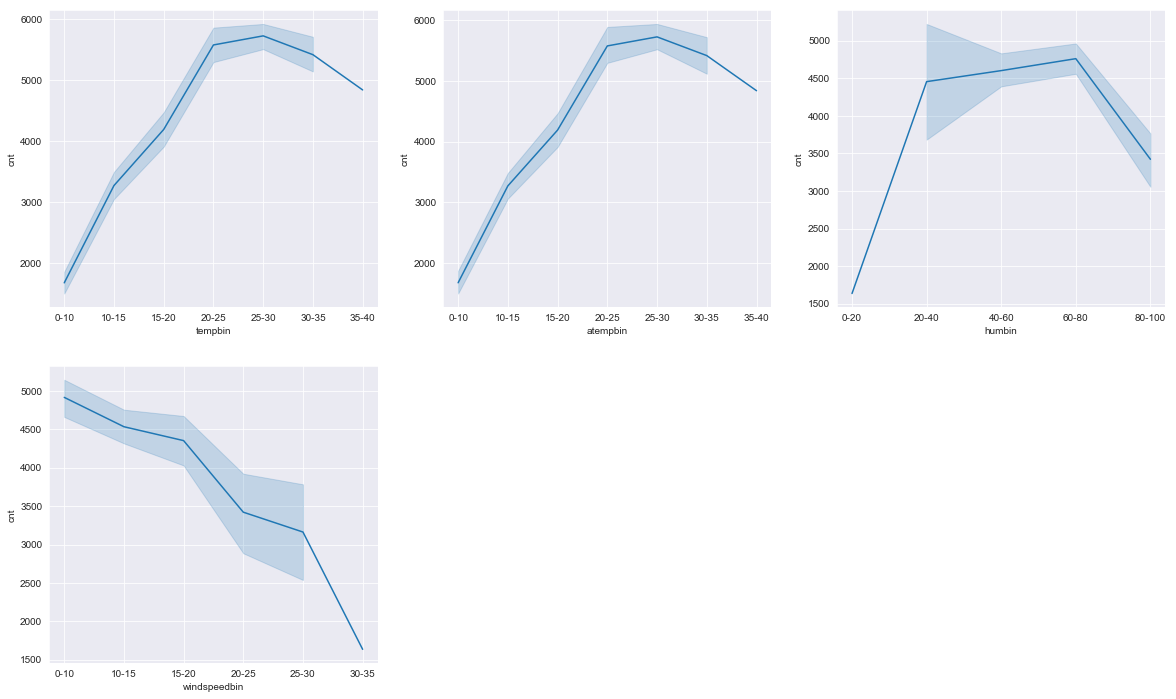

In [978]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.lineplot(x = 'tempbin', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.lineplot(x = 'atempbin', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.lineplot(x = 'humbin', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.lineplot(x = 'windspeedbin', y = 'cnt', data = bikes)


plt.show()

Above graph shows the general trend of the data temp and atemp clearly shows the trend while humidity as the humidity is higher the usability drops, as the windspeed increases usability shows. so there is a general trend among these data.

In [979]:
bikes.drop(['tempbin','atempbin','humbin','windspeedbin'],axis=1,inplace=True)

### Visualising Categorical Variables

Now the categorical vairable need to be assessed to answer whats the trend? what can be learnt from these ?. Box plots will be used to analyse these variables.

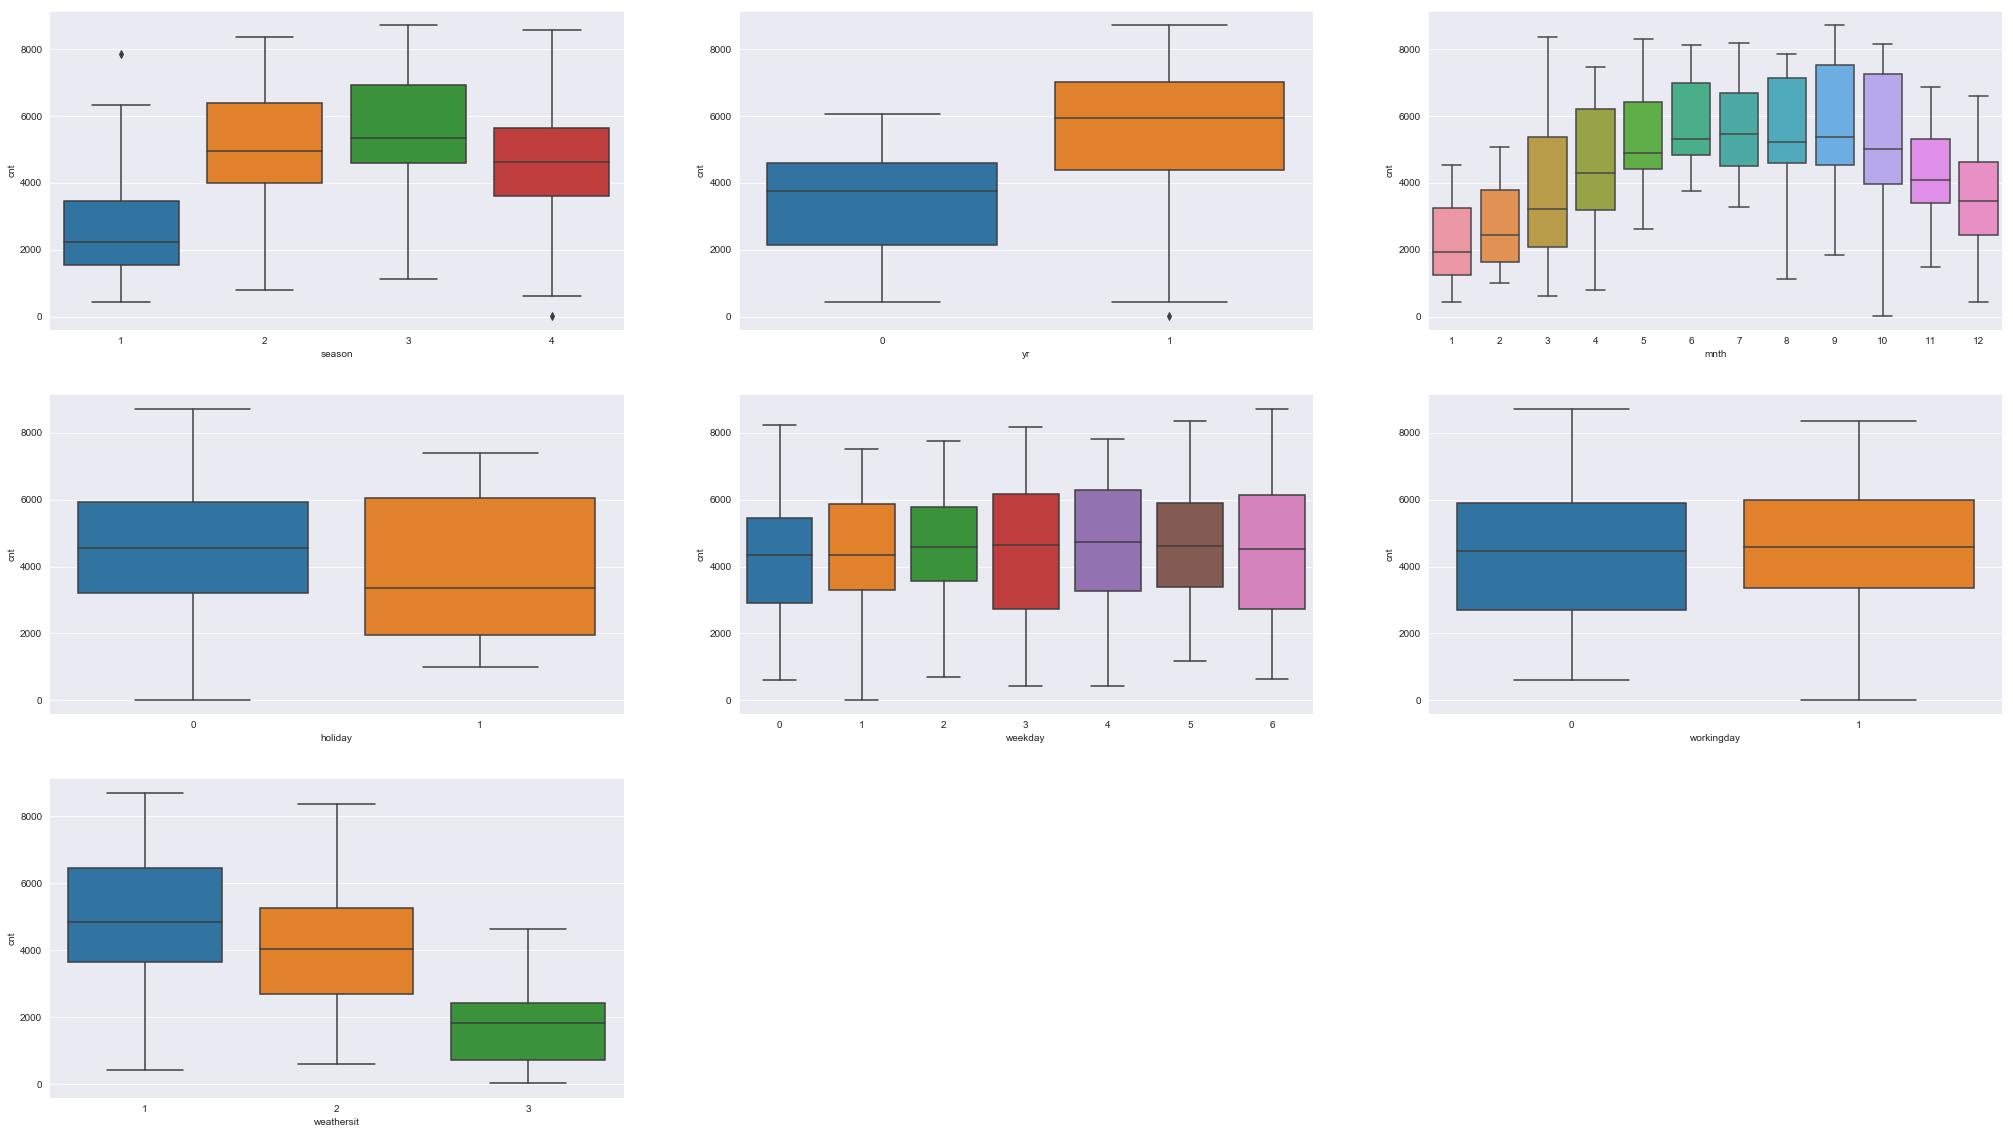

In [980]:
plt.figure(figsize=(35, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

#### Visual Trend of the above box plots

season : season (1:spring, 2:summer, 3:fall, 4:winter)
- season vs cnt : Spring and winter has the low count of users, while summer and fall tend to be higher count of users

yr : year (0: 2018, 1:2019)
- year vs cnt : data shows 2019 there where more users than 2018, this could be due to the popularity increase with the product

mnth : month ( 1 to 12)

- mnth vs cnt : this is a reflection of season information.

- holiday vs cnt  : median on non holiday is higher than holiday, there is slight trend showing non holiday might be better trend

- weekday vs cnt  : this data suggest there median are higher on mon-fri

- workingday vs cnt : the median shows that working day may be have a slight effect on use

weathersit : 
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


- weathersit vs cnt : data shows when it is clear (1) climate usuability is high as the weather worsens the usability drops.

### Step 3 : Data Preparation

Variables such as season , weathersit, weekday and month are in integer format (does not mean anything to the model) which will need to converted to strings mentioned in the decription before converting back to integer format using dummy variables.

In [981]:

varlist = ['season']

# Defining the map function
def map(x):
    return x.map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

# Applying the function to the housing list
bikes[varlist] = bikes[varlist].apply(map)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [982]:
varlist = ['weathersit']

# Defining the map function
def map(x):
    return x.map({1: "Clear", 2: "Mist", 3: "Light Snow", 4: "Snow + Fog"})

# Applying the function to the housing list
bikes[varlist] = bikes[varlist].apply(map)


In [983]:
varlist = ['mnth']

# Defining the map function
def map(x):
    return x.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
                   10:'October',11:'November',12:'December'})

# Applying the function to the housing list
bikes[varlist] = bikes[varlist].apply(map)


In [984]:
varlist = ['weekday']

# Defining the map function
def map(x):
    return x.map({0:'Sunday', 1:'Monday', 2:'Tuesday',3:'Wednesday', 4: 'Thursday', 5:'Friday', 6:'Saturday'})

# Applying the function to the housing list
bikes[varlist] = bikes[varlist].apply(map)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Year, Holiday and workingday is in 0 or 1 (yes or no) format so these variables can be left as it is

### Dummy Variables

In [985]:
season = pd.get_dummies(bikes['season'], drop_first=True)
bikes = pd.concat([bikes, season], axis = 1) 
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,Spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


First column is dropped since once cariable can be predicted from the others. (to avoid dummy variable trap). Same will be applied to all the rest of the variables.

In [986]:
mnth = pd.get_dummies(bikes['mnth'], drop_first=True)
bikes = pd.concat([bikes, mnth], axis = 1) 

weekday = pd.get_dummies(bikes['weekday'], drop_first=True)
bikes = pd.concat([bikes, weekday], axis = 1)

weathersit = pd.get_dummies(bikes['weathersit'], drop_first=True)
bikes = pd.concat([bikes, weathersit], axis = 1)

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,Spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,Spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Now the categorical variable columns need to be dropped since the dummy has been created for them, also atemp as well since it is heavely correlated with temp.

In [987]:
bikes.drop(['season','mnth','weekday','weathersit','atemp'], axis = 1, inplace = True)
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Step 4 : Splitting Data and Rescalling

The Data needs to be split into traning data and test data 

In [988]:
# Library is already called up at the top

bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescalling the Features

Now the variables such as temp, hum, windspeed and cnt needs to be scalled otherwise the model will very large or very small depending on the co-efficients

In [989]:
# MinMax Scaler library is called up in the top

scaler = MinMaxScaler()

num_vars = ['temp','hum', 'windspeed', 'cnt']

bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])


In [990]:
bikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [991]:
bikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It can be observed that all max has gone to 1.00 shows data is prepared to trained.

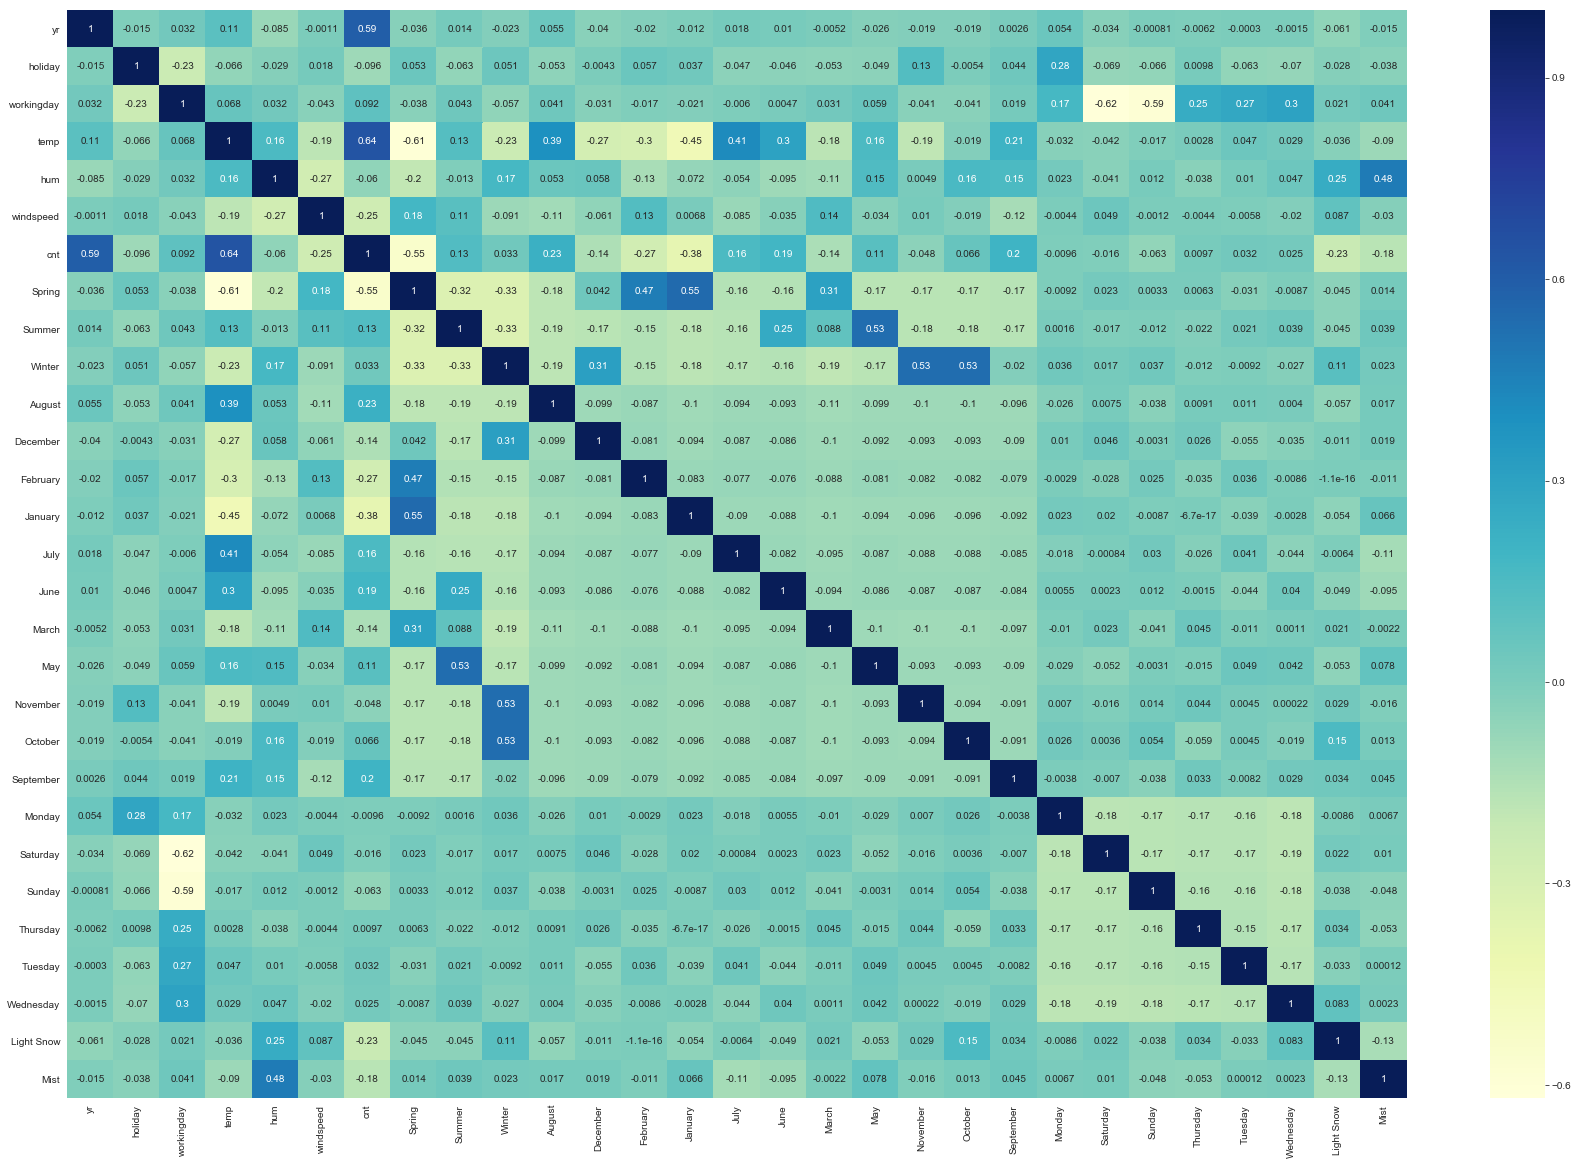

In [992]:
plt.figure(figsize = (30, 20))
sns.heatmap(bikes_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the Matrix we can see that cnt got good correlation with year, temp and atemp, also slight correlation with working day, summer, august, july, june and september. this agrees with the EDA.

### Step 5  : Training The Model

Training data needs to be divided into x and y train data

#### Dividing into X and Y sets 

In [993]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

Features will be selected using RFE (automatic coarse tunning) initially and then later on remove weakest features by comparing Ordinary Least Squares and VIF using linear method (fine tuning) to get optimum model

#### RFE Model

RFE will be initially used to pick 15 Features.

In [994]:

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

This will list out selected features and put them into ranking.

In [995]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 7),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 5),
 ('November', False, 2),
 ('October', False, 10),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 6),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

Code below will define the selected column for Fine Tunning.

In [996]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'January', 'July', 'September', 'Saturday',
       'Light Snow', 'Mist'],
      dtype='object')

This will show the rejected columns

In [997]:
X_train.columns[~rfe.support_]

Index(['August', 'December', 'February', 'June', 'March', 'May', 'November',
       'October', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

## Stats Model Analysis

### RFE ANALYSIS

Create a X_test Dataframe with the selected RFE features will be named in line from the where the data came from in this instance it is RFE

In [998]:
X_train_rfe = X_train[col]

Then a constant variable is added to model to ensure residuals have a mean of zero

In [999]:
X_train_rfe = sm.add_constant(X_train_rfe)

Then run the model, naming convention of the model will lm (linear model), this will change for each model to keep track of the model.

In [1000]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

Below shows the summary of the first training model

In [1001]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          2.31e-191
Time:                        23:19:35   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.0

In [1002]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe = X_train_rfe.drop(["const"], axis = 1)
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,Spring,4.53
8,Winter,3.48
7,Summer,2.84
14,Mist,2.29
0,yr,2.09
12,Saturday,1.98


Although p values are low the VIF for Humidity is high, so as next humidity will be dropped.Naming convection will be X_train_m1 (m1 = model 1)

### MODEL 1

In [1003]:
X_train_m1 = X_train_rfe.drop(["hum"], axis = 1)

In [1004]:
X_train_m1 = sm.add_constant(X_train_m1)

In [1005]:
lm1 = sm.OLS(y_train,X_train_m1).fit()

In [1006]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          7.33e-189
Time:                        23:19:35   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.525      0.0

In [1007]:
X_train_m1.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Spring',
       'Summer', 'Winter', 'January', 'July', 'September', 'Saturday',
       'Light Snow', 'Mist'],
      dtype='object')

In [1008]:
X_train_m1 = X_train_m1.drop(['const'], axis=1)

In [1009]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_m1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,Spring,3.08
6,Summer,2.33
0,yr,2.08
7,Winter,1.99
11,Saturday,1.97
8,January,1.62
9,July,1.59


After Model 1 holiday got a high p value and temp and workingday is higher than 5 VIF. So in the next model, holiday will be dropped instead of temp since we know from EDA temp does have a relationship.

### MODEL 2

In [1010]:
X_train_m2 = X_train_m1.drop(["workingday"], axis = 1)

In [1011]:
X_train_m2 = sm.add_constant(X_train_m2)

In [1012]:
lm2 = sm.OLS(y_train,X_train_m2).fit()

In [1013]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          1.21e-186
Time:                        23:19:36   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2121      0.030      6.986      0.0

From the OLS Regression results it can be seen that R Squared did not change much due to dropping working day and F prob is fairly low as well.

In [1014]:
X_train_m2 = X_train_m2.drop(['const'], axis=1)

In [1015]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_m2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.16
3,windspeed,4.64
4,Spring,2.76
5,Summer,2.23
0,yr,2.07
6,Winter,1.80
7,January,1.61
8,July,1.59
12,Mist,1.56
9,September,1.34


As seen from the Model 2 VIF did reduce massively, while maintining the rsquared and p values. In the next model windspeed will be dropped to see the effect on the model.

### MODEL 3

In [1016]:
X_train_m3 = X_train_m2.drop(["windspeed"], axis = 1)

In [1017]:
X_train_m3 = sm.add_constant(X_train_m3)

In [1018]:
lm3 = sm.OLS(y_train,X_train_m3).fit()

In [1019]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     196.1
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          1.02e-179
Time:                        23:19:36   Log-Likelihood:                 483.90
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     497   BIC:                            -886.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1552      0.030      5.168      0.0

R squared did not change much due to dropping feature windspeed. but as we can see P values for January and Saturday.

In [1020]:
X_train_m3 = X_train_m3.drop(['const'], axis=1)

In [1021]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_m3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.34
0,yr,2.07
3,Spring,2.02
4,Summer,1.94
5,Winter,1.60
6,January,1.60
7,July,1.59
11,Mist,1.56
8,September,1.34
9,Saturday,1.19


VIF values are below 5 after removing feature windspeed and Rsquared did not change much but P value for January is high, January will be removed on the next model. 

### MODEL 4

In [1022]:
X_train_m4 = X_train_m3.drop(["January"], axis = 1)

In [1023]:
X_train_m4 = sm.add_constant(X_train_m4)

In [1024]:
lm4 = sm.OLS(y_train,X_train_m4).fit()

In [1025]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.5
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          1.57e-180
Time:                        23:19:36   Log-Likelihood:                 483.04
No. Observations:                 510   AIC:                            -942.1
Df Residuals:                     498   BIC:                            -891.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1468      0.029      5.002      0.0

P Value did not change much due to dropping the feature January. All the P values are fairly low except Saturday and F Stat prob is fairly low.

In [1026]:
X_train_m4 = X_train_m4.drop(['const'], axis=1)

In [1027]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_m4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.27
0,yr,2.07
4,Summer,1.93
5,Winter,1.60
6,July,1.58
10,Mist,1.55
3,Spring,1.43
7,September,1.34
8,Saturday,1.19
9,Light Snow,1.07


VIF Scores are below 5 still , in the next model Saturday will be dropped to see its significance 

### MODEL 5

In [1028]:
X_train_m5 = X_train_m4.drop(['Saturday'], axis = 1)

In [1029]:
X_train_m5 = sm.add_constant(X_train_m5)

In [1030]:
lm5 = sm.OLS(y_train,X_train_m5).fit()

In [1031]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          2.80e-181
Time:                        23:19:36   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1503      0.029      5.134      0.0

R squared did not change much due to removing feature Saturday, F Prob and P values mainted the similar level.

In [1032]:
X_train_m5 = X_train_m5.drop(['const'], axis=1)

In [1033]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_m5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.22
0,yr,2.06
4,Summer,1.93
5,Winter,1.58
6,July,1.58
9,Mist,1.55
3,Spring,1.40
7,September,1.34
8,Light Snow,1.07
1,holiday,1.04


VIF Scores maintained below 5, but summer does have a slighty higher P values, this feature will be removed to see the significance.

### MODEL 6

In [1034]:
X_train_m6 = X_train_m5.drop(['Summer'], axis = 1)

In [1035]:
X_train_m6 = sm.add_constant(X_train_m6)

In [1036]:
lm6 = sm.OLS(y_train,X_train_m6).fit()

In [1037]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          2.16e-181
Time:                        23:19:36   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1938      0.022      8.750      0.0

In [1038]:
X_train_m6.columns

Index(['const', 'yr', 'holiday', 'temp', 'Spring', 'Winter', 'July',
       'September', 'Light Snow', 'Mist'],
      dtype='object')

In [1039]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_m6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.47
3,temp,2.79
4,Spring,2.54
5,Winter,1.69
6,July,1.28
7,September,1.10
8,Light Snow,1.04
9,Mist,1.04
1,yr,1.02
2,holiday,1.02


Model 6 does have low F prob , Low P Values and Low VIF Score. This model looks good enough.

In [1040]:
X_train_mf = X_train_m6.drop(['const'], axis=1) # final list without constant

## Step 6 : Residual Analysis of the trained Data

In [1041]:
y_train_pred = lm6.predict(X_train_m6)

In [1042]:
res=y_train-y_train_pred

### Normality of residuals

Using Histogram

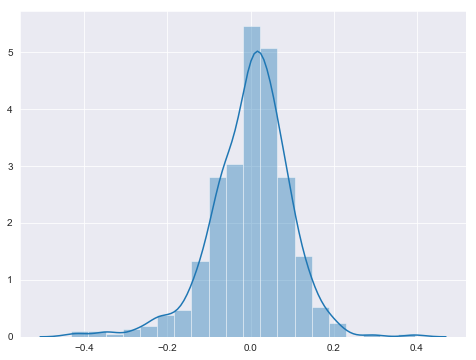

In [1043]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.distplot(res,bins=20)
plt.show()


Using Q-Q plot 

<Figure size 1440x864 with 0 Axes>

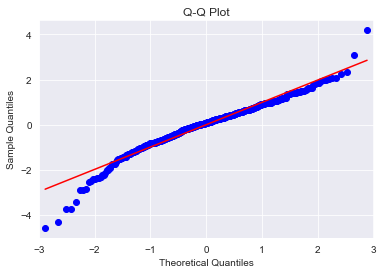

In [1044]:
residual  = np.mean(res)

plt.figure(figsize=[20, 12])
sm.qqplot(res, fit = True, line = 'r')
plt.title('Q-Q Plot')
plt.show()

Relatively small number of data points in these normally distrubted data stays in the highest and lowest quantiles, at the extreme ends we are most likely to see some fluctuations at the extremes. It also shows the model follows a normal distribution.

### Homoscedasticity

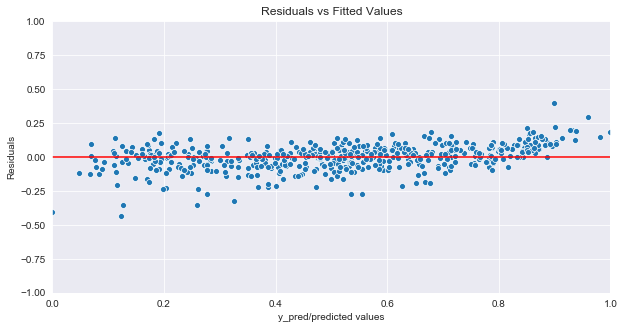

In [1045]:
plt.figure(figsize=(10,5))
p = sns.scatterplot(y_train,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0,1)
p = sns.lineplot([0,26],[0,0],color='Red')
p = plt.title('Residuals vs Fitted Values')

Constant error is around the 0 line , so the constant variance is around the zero line. From this grpah we can say the model is homoscedasticic

##  Step 7 : Prediction Using the Final Model on Test Data

In [1046]:
bikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1047]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])

In [1048]:
bikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1049]:
bikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### X test and Y Test

In [1050]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [1051]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_mf.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1052]:
# Making predictions
y_pred = lm6.predict(X_test_new)

## Step 8 : Model Evaluation

Text(0, 0.5, 'y_pred')

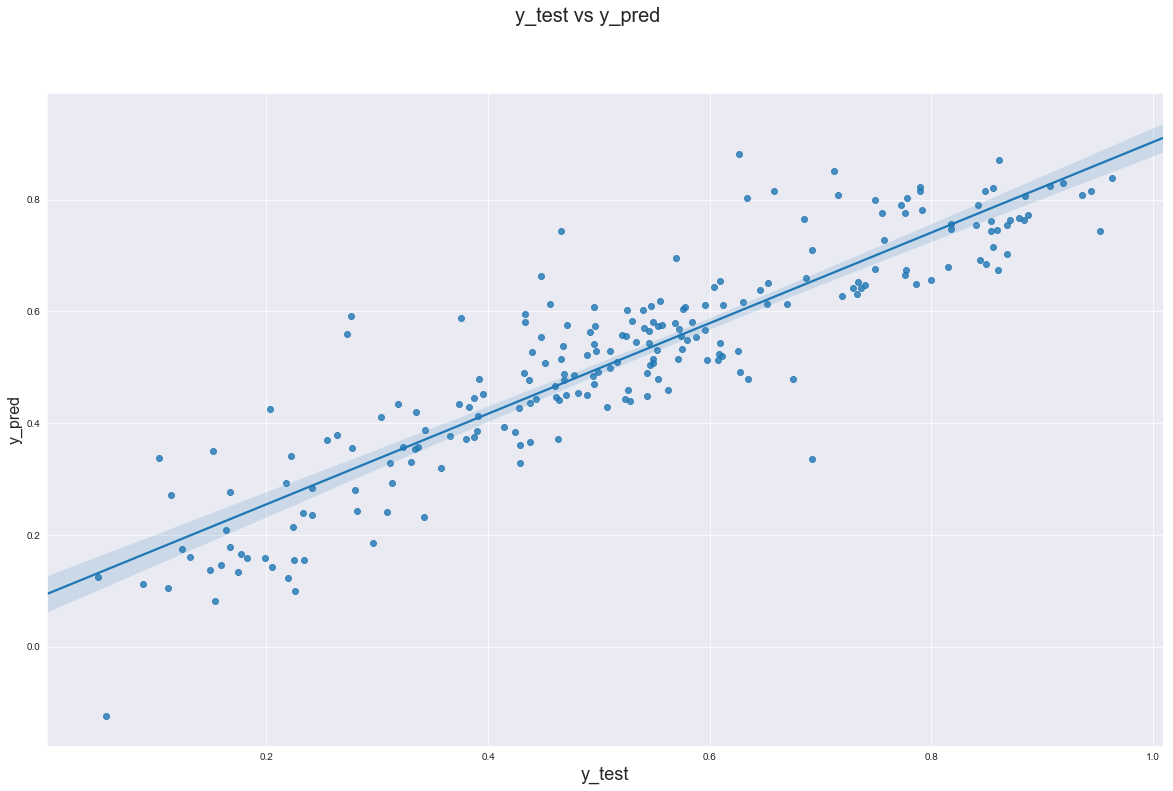

In [1053]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure(figsize = (20,12))
sns.regplot(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [1054]:
from sklearn.metrics import r2_score

In [1055]:
print("R-squared for the Test Set :")
r2_score(y_true=y_test,y_pred=y_pred)

R-squared for the Test Set :


0.8092200832884748

In [1056]:
print("R-squared for the Training Set :")
r2_score(y_true=y_train,y_pred=y_train_pred)

R-squared for the Training Set :


0.8225173906649428

In [1057]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error : {mae:.2f}')
print(f'Mean Squared Error : {mse:.2f}')
print(f'Root Mean Squared Error : {rmse:.2f}')

Mean Absolute Error : 0.07
Mean Squared Error : 0.01
Root Mean Squared Error : 0.10


RMSE is at 0.1 this shows the model works fine but could be improved.

Best Equation Fitting the line would be :

$ Count  = 0.233 \times yr - 0.1011 \times holiday + 0.4712 \times temp - 0.1107 \times Spring + 0.0558 \times Winter - 0.0688 \times July + 0.0658 \times September - 0.3002 \times Light Snow - 0.0796 \times Mist $